In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['cyan','orange'])
cmap_bold = ListedColormap(['red', 'blue'])
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.ticker import ScalarFormatter

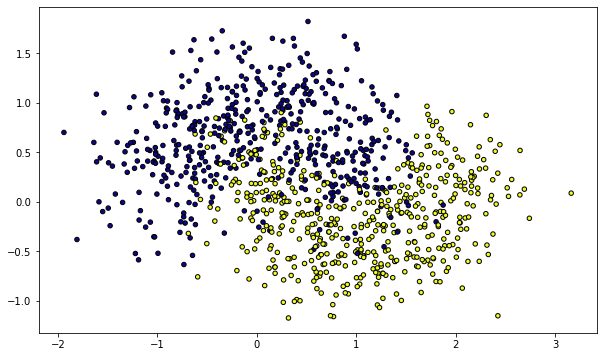

In [3]:
data = make_moons(n_samples=1000, noise=0.35)
plt.figure(figsize=(10,6))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='plasma',s=20, edgecolors='k')
plt.show()

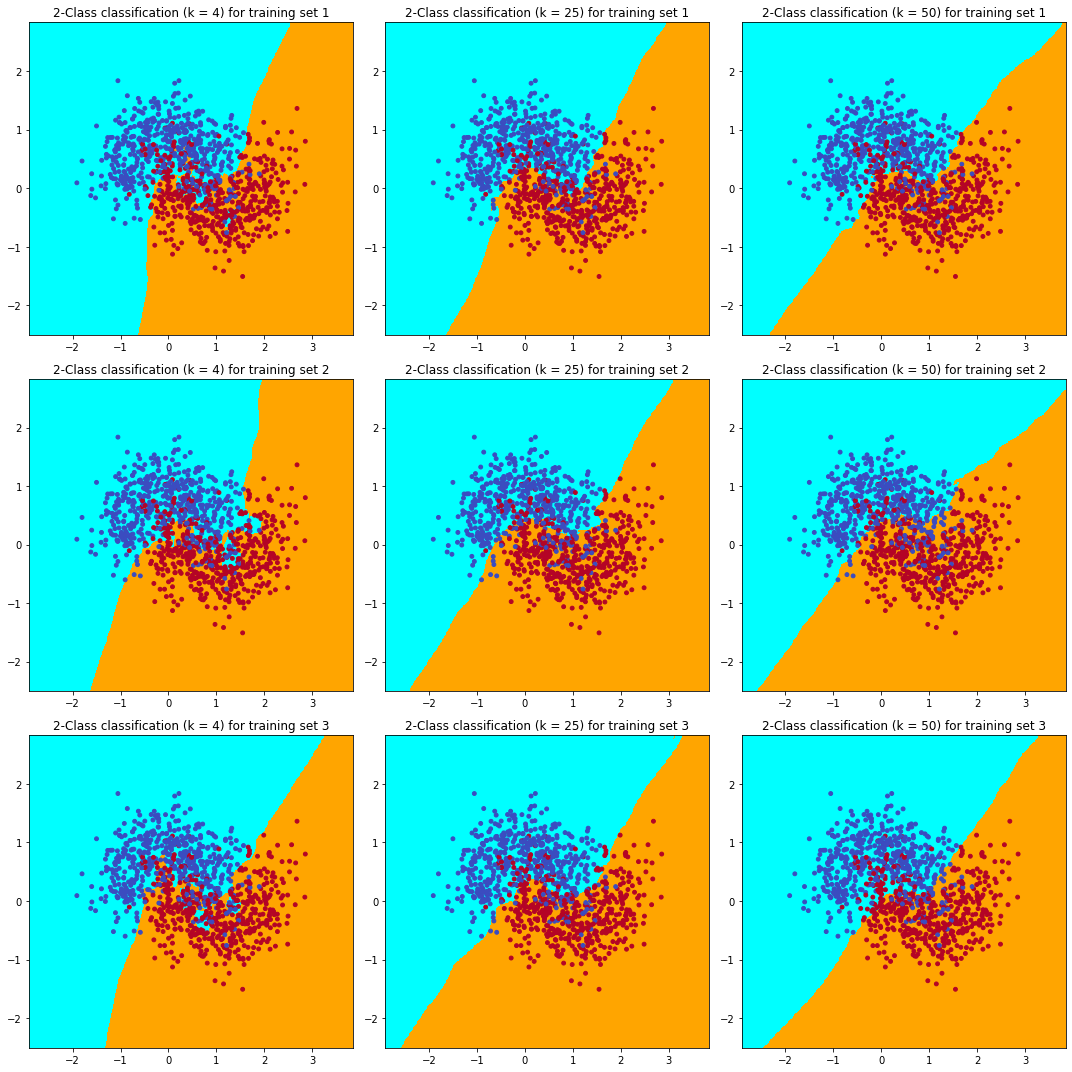

In [6]:
K = [4,25,50]
X = data[0]
y = data[1]
h=0.02
pad=1
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for k in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.15)

        model = KNeighborsClassifier(n_neighbors=K[k])
        model.fit(X_train, y_train)
        
        x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
        y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        
#         axes[i][k].pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
        axes[i][k].scatter(xx.ravel(), yy.ravel(), c=Z,s=15,cmap=cmap_light,marker=',')
    
        # Plot also the training points
        axes[i][k].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=15)
        axes[i][k].set_xlim(xx.min(), xx.max())
        axes[i][k].set_ylim(yy.min(), yy.max())
        axes[i][k].set_title("2-Class classification (k = %i) for training set %i"% (K[k],i+1))
plt.tight_layout()
plt.show()

In [11]:
test_data = make_moons(n_samples=500, noise=0.35)
X_train, X_test, y_train, y_test = data[0], test_data[0], data[1], test_data[1]

In [12]:
train_error_rate = []
test_error_rate = []
for i in range(1,500):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    train_error_rate.append(np.mean(pred_train != y_train))
    test_error_rate.append(np.mean(pred_test != y_test))

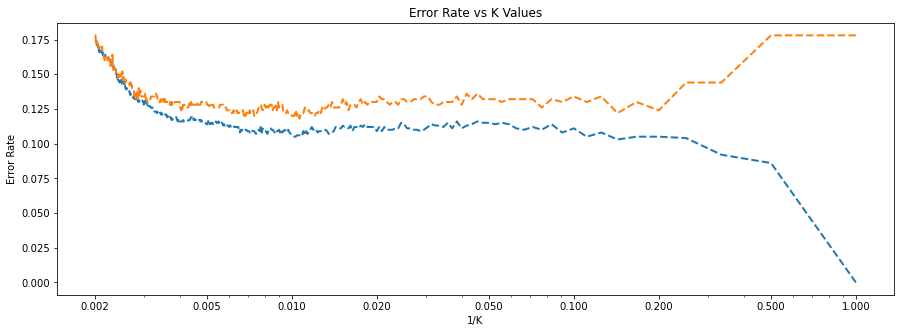

In [15]:
fig,ax = plt.subplots(figsize=(15,5))
x=np.linspace(1,499,499)
ax.plot(1/x, train_error_rate, linestyle='dashed', linewidth=2, label='train error')
ax.plot(1/x, test_error_rate, linestyle='dashed', linewidth=2, label='test error')
# plt.xticks([0.01,0.02,0.05,0.1,0.2,0.5,1])
ax.set_xscale('log')
ax.set_xticks([0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1])
ax.get_xaxis().set_major_formatter(ScalarFormatter())
ax.set_title('Error Rate vs K Values')
ax.set_xlabel('1/K')
ax.set_ylabel('Error Rate')
plt.show()

In [28]:
cv_scores = []
neighbors = list(range(1,501))
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 130


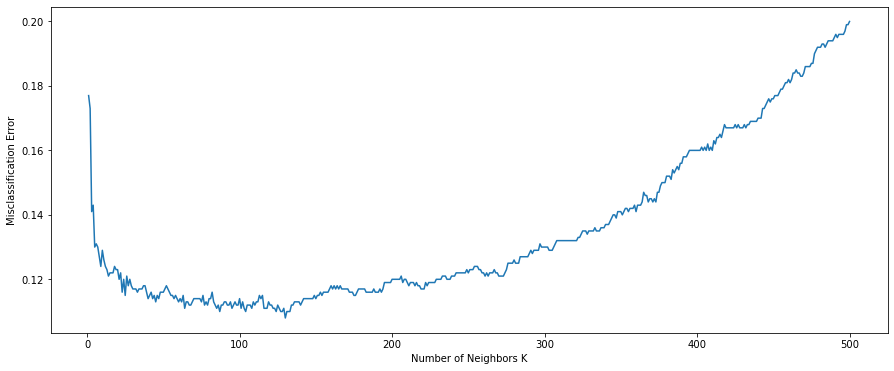

In [29]:
mse = [1 - x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))
plt.figure(figsize=(15,6))
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()